In [42]:
import snappy
import csv

Let's implement the necessary functions to apply operation 1 and 2 on knot diagrams through functions on pd codes:

In [43]:
def cc(pd2,i):
    '''
    changes the ith crossing
    '''
    pd=pd2.copy()
    if pos_crossing(pd,i):
        [a,b,c,d]=pd[i]
        pd[i]=[d,a,b,c]
    else:
        [a,b,c,d]=pd[i]
        pd[i]=[b,c,d,a]
    return(pd)

def pos_crossing(pd,i):
    '''
    True if the i-th crossing is positive, False else
    '''
    n=max([max(k) for k in pd])
    (a,b,c,d)=pd[i]
    if d==n:
        if b==0:
            return(True)
    if b==n:
        if d==0:
            return(False)
    if d<b:
        return(True)
    return(False)

def crossing_changer(pd):
    '''
    input: A pd-code
    output: list of pd codes corresponding crossing changes in pd
    '''
    l=[]
    for i in range(len(pd)):
        new_pd=cc(pd,i)
        l.append([new_pd,[i,'cc']])
    return(l)


def two_crossing_changer(pd):
    '''
    input: pd code
    output: returns list of pd codes corresponding to changement of a positive and a negative crossing
    '''
    l=[]
    for i in range(len(pd)):
        if pos_crossing(pd,i):
            for j in range(len(pd)):
                if not pos_crossing(pd,j) and i!=j:
                    l.append([cc(cc(pd,i),j),[(i,j),'cc+-']])
    return(l)

In [44]:
name_slice_knotinfo=[]
with open('/Users/leomousseau/Desktop/Bachelor code census/slice_knotinfo','r') as inp:
    reader=csv.reader(inp)
    for row in reader:
        name_slice_knotinfo.append([row[0],int(row[1])])
slice_genus_knotinfo=dict(name_slice_knotinfo)
        
name_top_knotinfo=[]
with open('/Users/leomousseau/Desktop/Bachelor code census/top_knotinfo','r') as inp:
    reader=csv.reader(inp)
    for row in reader:
        try:
            name_top_knotinfo.append([row[0],int(row[1])])
        except:
            name_top_knotinfo.append([row[0],2]) # those are all (1,2) and we bound them by 2 from above for our purposes later
topological_genus_knotinfo=dict(name_top_knotinfo)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/leomousseau/Desktop/Bachelor code census/slice_knotinfo'

In [45]:
def low_crossing_genus(pd):
    '''
    input: pd code
    output: bound on both slice genera
    '''
    K=snappy.Link(pd)
    M=K.exterior()
    if len(M.fundamental_group().generators())==1 and M.fundamental_group().relators()==[]:
        return((0,0))
    name='undefined'
    m=0
    if name=='undefined' and m<100:
        if M.identify()==[]:
            M.randomize()
        else:
            name=M.identify()[0].name()
        m=m+1
    if name!='undefined':
        slice_genus=slice_genus_knotinfo[name]
        topological_genus=topological_genus_knotinfo[name]
        slice_bound=slice_genus
        top_bound=topological_genus
    else: #the knot is composite
        prime_decomp=prime_decomposition(K)
        slice_sum=0
        top_sum=0
        for L in prime_decomp:
            M=L.exterior()
            name='undefined'
            m=0
            if name=='undefined' and m<100:
                if M.identify()==[]:
                    M.randomize()
                else:
                    name=M.identify()[0].name()
                m=m+1
            try:
                slice_sum+=slice_genus_knotinfo[name]
                top_sum+=topological_genus_knotinfo[name]
            except:
                # this error occurs when the knot is torus, since SnapPy cannot identify them because 
                # they are not hyperbolic. We write a function which recognizes torus knots, and output 
                # the coefficients (p,q) which allow us to get 
                [x,y]=identify_torus(L.PD_code())
                if x=='True':
                    (p,q)=y
                    slice_sum+=(1/2)*(p-1)*(q-1)
                    top_sum+=(1/2)*(p-1)*(q-1)
                else:
                    print(L.PD_code(),'ERROR, it is not identifiable and not torus')
                    slice_sum+=5 #'largest slice genus among low crossing knots'
                    top_sum+=5 #'largest slice genus among low crossing knots'
            
        slice_bound=slice_sum
        top_bound=top_sum
        
    return(slice_bound,top_bound)    

In [46]:
def identify_torus(pd):
    '''
    input: a knot
    output: if the output is (p,q), then the knot is the p,q torus knot. If the return is false, then it is not
    '''
    K=snappy.Link(pd)
    if len(K.deconnect_sum())!=1:
        return(['False','non-prime!'])
    # therefore K is prime, and determined by its knot group (by rigidity)
    g=K.exterior().fundamental_group()
    #print(g)
    if g.generators()==['a', 'b']:
        if len(g.relators())==1:
            word=g.relators()[0]
            counter=0
            for i in range(len(word)):
                if word[i]=='a' or word[i]=='A':
                    if i!=len(word)-1:
                        if word[i+1]=='b' or word[i+1]=='B':
                            counter=counter+1
            if counter==1: #its torus
                p=word.count('a')
                q=word.count('b')
                return(['True',(p,q)])
            
            if counter!=1:
                return(['False','relator word not right'])
        else:
            return(['False','relator'])
    else:
        return(['False','generators'])


lets get a pd our knot, the negative whitehead double of the positive trefoil, by drawing it explicitely in snappy and obtain its PD-code:

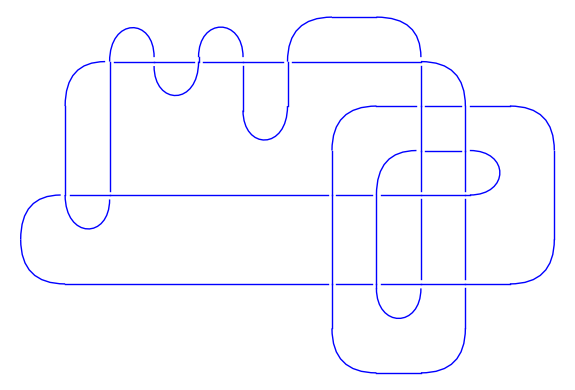

In [47]:
natural_pd=[(26,34,27,33),(30,26,31,25),(22,30,23,29),(19,28,20,29),(31,16,32,17),(15,32,16,33),(23,12,24,13),(18,14,19,13),(27,8,28,9),(11,24,12,25),(10,18,11,17),(14,10,15,9),(7,35,8,34),(35,7,36,6),(5,37,6,36),(37,5,38,4),(3,39,4,38),(39,3,40,2),(1,20,2,21),(21,40,22,1)]
W=snappy.Link(natural_pd)
W.sage_link().plot()

Let's generate new pd codes which represent the negative whitehead double of the positive trefoil

In [48]:
pd_codes_simplified=[]
for k in range(200):
    W.backtrack(steps = 40, prob_type_1 =0.5, prob_type_2 = 0.5)
    W.simplify('level') 
    pd_codes_simplified.append(W.PD_code())    

In [49]:
len(pd_codes_simplified)

200

For every diagram (in pd_codes) we change every crossing to look for a knot which has smooth 4 genus bigger than 1 through the bound coming from knot floer homology (abs(tau)=<g4(K))

lets do the same thing, except we do it with changing one positive and one negative crossing, since this is also a genus one concordance

In [51]:
potentially_obstructing1=[]  
for pd in pd_codes_simplified:
    for i in range(len(pd)):
        if pos_crossing(pd,i):
            for j in range(len(pd)):
                if not pos_crossing(pd,j):
                    new_pd=cc(cc(pd,i),j)
                    L=snappy.Link(new_pd)
                    L.simplify('level')
                    name=L.exterior().identify()
                    if name==[]: # if we cannot identify the knot, we hope that its tau invariant gives that it has 4 genus 2
                        tau=L.knot_floer_homology()['tau']
                        if abs(tau)>=1:
                            potentially_obstructing1.append([L.PD_code(),(i,j),pd])  
                            if abs(tau)>1:
                                print('SLICE GENUS PULLED UP TO 1 SUCCESSFULLY!')


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
[m074(0,0), 8_1(0,0), K5_2(0,0), K8a11(0,0)] 8
[m074(0,0), 8_1(0,0), K5_2(0,0), K8a11(0,0)] 8
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
[m074(0,0), 8_1(0,0), K5_2(0,0), K8a11(0,0)] 8
[m074(0,0), 8_1(0,0), K5_2(0,0), K8a11(0,0)] 8
95
96
[m074(0,0), 8_1(0,0), K5_2(0,0), K8a11(0,0)] 8
[m074(0,0), 8_1(0,0), K5_2(0,0), K8a11(0,0)] 8
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
[m074(0,0), 8_1(0,0), K5_2(0,0), K8a11(0,0)] 8
[m074(0,0), 8_1(0,0), K5_2(0,0), K8a11(0,0)] 8
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183


In [52]:
counter=0
o2=[]  
for pd in pd_codes_simplified:
    for i in range(len(pd)):
        new_pd=cc(pd,i)
        L=snappy.Link(new_pd)
        L.simplify('level')
        name=L.exterior().identify()
        if name==[]: # if we cannot identify the knot, we hope that its tau invariant gives that it has 4 genus 2
            tau=L.knot_floer_homology()['tau']
            if abs(tau)>=1 :
                 o2.append([L.PD_code(),(i,j),pd])  
        else:
            if name not in o:
                print(name,len(L.crossings))
            o2.append(name)
    counter+=1
    print(counter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [53]:
#with open('potentially obstructing','w') as out:
        writer=csv.writer(out)
        for row in o1+o2:
            writer.writerow(row)

In [57]:
len(o1)

11264

In [56]:
o2[100]

[[(17, 36, 18, 37),
  (14, 0, 15, 39),
  (38, 10, 39, 9),
  (29, 4, 30, 5),
  (34, 2, 35, 1),
  (24, 16, 25, 15),
  (13, 11, 14, 10),
  (7, 26, 8, 27),
  (35, 29, 36, 28),
  (30, 20, 31, 19),
  (6, 38, 7, 37),
  (31, 12, 32, 13),
  (16, 28, 17, 27),
  (20, 4, 21, 3),
  (5, 19, 6, 18),
  (33, 22, 34, 23),
  (2, 22, 3, 21),
  (11, 32, 12, 33),
  (25, 8, 26, 9),
  (23, 1, 24, 0)],
 (1, 19),
 [(18, 37, 19, 38),
  (38, 13, 39, 14),
  (39, 11, 0, 10),
  (29, 2, 30, 3),
  (34, 4, 35, 3),
  (24, 16, 25, 15),
  (14, 10, 15, 9),
  (7, 26, 8, 27),
  (33, 31, 34, 30),
  (28, 22, 29, 21),
  (5, 37, 6, 36),
  (31, 12, 32, 13),
  (16, 28, 17, 27),
  (19, 5, 20, 4),
  (6, 18, 7, 17),
  (35, 20, 36, 21),
  (1, 23, 2, 22),
  (11, 32, 12, 33),
  (25, 8, 26, 9),
  (23, 1, 24, 0)]]